#  Linear regression by using Deep Neural network on Boston

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error  
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

C:\Users\Asus\AppData\Local\Temp\ipykernel_18628\1534768175.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


ImportError: Traceback (most recent call last):
  File "c:\Python 3.7\lib\site-packages\tensorflow\python\pywrap_tensorflow.py", line 73, in <module>
    from tensorflow.python._pywrap_tensorflow_internal import *
ImportError: DLL load failed while importing _pywrap_tensorflow_internal: A dynamic link library (DLL) initialization routine failed.


Failed to load the native TensorFlow runtime.
See https://www.tensorflow.org/install/errors for some common causes and solutions.
If you need help, create an issue at https://github.com/tensorflow/tensorflow/issues and include the entire stack trace above this error message.

In [22]:
dataset=pd.read_csv("BostonHousing.csv")

In [23]:
df = dataset
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [24]:
X = df.drop('medv', axis = 1)
y = df['medv']

In [25]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: medv, Length: 506, dtype: float64

#### Splitting and scaling

In [26]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2, random_state=42)

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

##  Build the model (linear regression) using Deep Neural Network

In [35]:

model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # input_shape as parameter
    layers.Dense(32, activation='relu'),
    layers.Dense(1)  
])

## Compile the model

In [30]:
# compile the model
model.compile(optimizer='adam', 
              loss='mse', 
              metrics=['mae'])  

## Train the model

In [31]:
history = model.fit(X_train , y_train, epochs=100 , validation_data=(X_test, y_test),batch_size=32)

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 613.4983 - mae: 22.8868 - val_loss: 503.0348 - val_mae: 20.7516
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 576.7244 - mae: 21.9998 - val_loss: 466.8065 - val_mae: 19.8709
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 529.6752 - mae: 21.0428 - val_loss: 422.0987 - val_mae: 18.7534
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 456.6913 - mae: 19.3808 - val_loss: 364.1725 - val_mae: 17.2925
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 397.8022 - mae: 17.6816 - val_loss: 293.1417 - val_mae: 15.3706
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 328.3752 - mae: 15.9905 - val_loss: 215.4971 - val_mae: 12.9679
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 242.3482 - mae: 13.1806 - val_loss: 141.7457 - val_mae: 10.3103
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 152.5581 - mae: 10.1754 - val_loss: 88.5328 - val_mae: 7.8256
Epoch 9/100
13/13

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


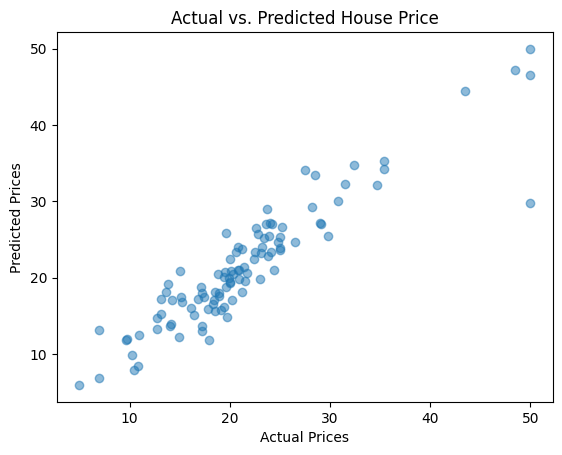

In [33]:
y_pred = model.predict(X_test)

plt.scatter(y_test , y_pred , alpha=0.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs. Predicted House Price")
plt.show()

## Model Evaluation

In [34]:
test_loss , test_mae = model.evaluate(X_test,y_test)
print(f"Test Mean Absolute Error : {test_mae:.2f}")
r2 = r2_score(y_test, y_pred)
print(f""" R²: {r2:.2f}""")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 8.1195 - mae: 2.0567
Test Mean Absolute Error : 2.19
 R²: 0.85
